# Pattern Recognition Assignment 3
### By CS20B1006 Sravanth Chowdary Potluri

In [28]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

1. Consider the 128- dimensional feature vectors (d=128) given in the “gender.csv” file. (2 classes, male and female)
a) Use PCA to reduce the dimension from d to d‟. (Here d=128)
b) Display the eigenvalue based on increasing order, select the d‟ of the corresponding eigenvector which is the appropriate dimension d‟ ( select d‟ S.T first 95% of λ values of the covariance matrix are considered).
c) Use d‟ features to classify the test cases (use any classification algorithm taught in class like Bayes classifier, minimum distance classifier, and so on)

In [29]:
# loading the gender.csv file into dataframe

df = pd.read_csv("./gender.csv")

df

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,797,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,798,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,799,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [30]:
# drop Unnamed: 0 and Unnamed: 1 columns as class labels are not required for PCA

# get the class labels from the dataframe
labels = df['Unnamed: 1'].unique()

df_labels = df['Unnamed: 1']

df1 = df.drop(columns = ["Unnamed: 0"])

# rename the Unnamed: 1 column to class
df1.rename(columns = {"Unnamed: 1": "class"}, inplace = True)

# drop the class column
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 1"])

df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,-0.121480,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,-0.069665,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,-0.104478,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,-0.162894,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [31]:
df1

,class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [32]:
print(df.shape)

(800, 128)


In [33]:
# splitting the data into training and testing data with first 10 of each class as training data and rest as testing data

# splitting the dataframe df1 into 2 based on class labels
df_male = df1[df1['class'] == 'male']

df_female = df1[df1['class'] == 'female']

# taking 1st 10 from each class as testing data
df_test = pd.concat([df_male.iloc[0:10], df_female.iloc[0:10]])

df_test_labels = df_test['class']

df_test = df_test.drop(columns = ["class"])

# taking rest of the data as training data
df_train = pd.concat([df_male.iloc[10:], df_female.iloc[10:]])

df_train_labels = df_train['class']

df_train = df_train.drop(columns = ["class"])

## PCA using Inbuilt Function

In [34]:
# PCA using inbuilt function in sklearn to capture 95% of variance

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

pca.fit(df)

pca.n_components_

57

In [35]:
# classify the test data using the training data after PCA

# transform the training data
df_train_pca = pca.transform(df_train)

# transform the testing data
df_test_pca = pca.transform(df_test)

# classify the testing data using Nearest Neighbor Classifier and print the accuracy 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(df_train_pca, df_train_labels)

pred = knn.predict(df_test_pca)

from sklearn.metrics import accuracy_score

print("Accuracy of the model using Nearest Neighbor is: ", accuracy_score(df_test_labels, pred)*100, "%")

# classify the test data using Naive Bayes Classifier and print the accuracy

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(df_train_pca, df_train_labels)

pred = gnb.predict(df_test_pca)

print("Accuracy of the model using Naive Bayes is: ", accuracy_score(df_test_labels, pred)*100, "%")


Accuracy of the model using Nearest Neighbor is:  85.0 %
Accuracy of the model using Naive Bayes is:  85.0 %


## **PCA Without using Inbuilt Function**

In [36]:
# class PCA is defined to perform PCA on the data without using inbuilt functions and to capture 95% of variance

class PCA_inbuilt:
    def __init__(self, n_components = 0.95):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.variance = None
        self.explained_variance = None
        
    def fit(self, X):
        # mean of the data
        self.mean = np.mean(X, axis = 0)
        # subtract the mean from the data to make it mean centered
        X = X - self.mean
        # calculate the covariance matrix
        cov = np.cov(X.T)
        # calculate the eigen values and eigen vectors
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        eigen_values, eigen_vectors = eigen_values.real, eigen_vectors.real
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key = lambda x: x[0], reverse = True)
        self.variance = sum(eigen_values)

        # calculate the variance captured by each component
        self.explained_variance = [eigen_pairs[i][0]/self.variance for i in range(len(eigen_pairs))]
        for i in range(len(eigen_pairs)):
            print("Variance captured by component", i+1, "is", eigen_pairs[i][0]/self.variance)

        # calculate the number of components required to capture 95% of variance
        cum_sum = 0
        for i in range(len(eigen_pairs)):
            cum_sum += eigen_pairs[i][0]
            if cum_sum/self.variance >= self.n_components:
                self.n_components = i + 1
                break
        self.components = np.array([eigen_pairs[i][1] for i in range(self.n_components)])

    # function to plot the variance vs number of components
    def plot_variance(self):
        plt.plot(np.cumsum(self.explained_variance))
        plt.xlabel("Number of principal components")
        plt.ylabel("Cumulative explained variance")
        plt.show()
        
    # function to transform the data
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [37]:
# PCA is performed on the data without using inbuilt functions and to capture 95% of variance
pca = PCA_inbuilt()

pca.fit(df)

print("Number of components required to capture 95% of variance is: ", pca.n_components)

Variance captured by component 1 is 0.12353020649086624
Variance captured by component 2 is 0.07196408026147098
Variance captured by component 3 is 0.0512824921755013
Variance captured by component 4 is 0.04346508174041753
Variance captured by component 5 is 0.03800638217885625
Variance captured by component 6 is 0.03564404055809775
Variance captured by component 7 is 0.030312793993019747
Variance captured by component 8 is 0.027102073563969178
Variance captured by component 9 is 0.025404007479259604
Variance captured by component 10 is 0.023744188122358165
Variance captured by component 11 is 0.022679152317608666
Variance captured by component 12 is 0.021374539295361126
Variance captured by component 13 is 0.020257448389925384
Variance captured by component 14 is 0.019415589946185825
Variance captured by component 15 is 0.01892082368412168
Variance captured by component 16 is 0.017327675033688383
Variance captured by component 17 is 0.016605251530297797
Variance captured by component 

In [38]:
# transform the training data
df_train_pca = pca.transform(df_train)

# transform the testing data
df_test_pca = pca.transform(df_test)

# classify the testing data using Nearest Neighbor Classifier (neighbors=1 is Minimum Distance classifier) and print the accuracy
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(df_train_pca, df_train_labels)

pred_mindist_pca = knn.predict(df_test_pca)

print("Accuracy of the model using Nearest Neighbor is: ", accuracy_score(df_test_labels, pred)*100, "%")

# classify the test data using Naive Bayes Classifier and print the accuracy
gnb = GaussianNB()

gnb.fit(df_train_pca, df_train_labels)

pred_nb_pca = gnb.predict(df_test_pca)

print("Accuracy of the model using Naive Bayes is: ", accuracy_score(df_test_labels, pred)*100, "%")

Accuracy of the model using Nearest Neighbor is:  85.0 %
Accuracy of the model using Naive Bayes is:  85.0 %


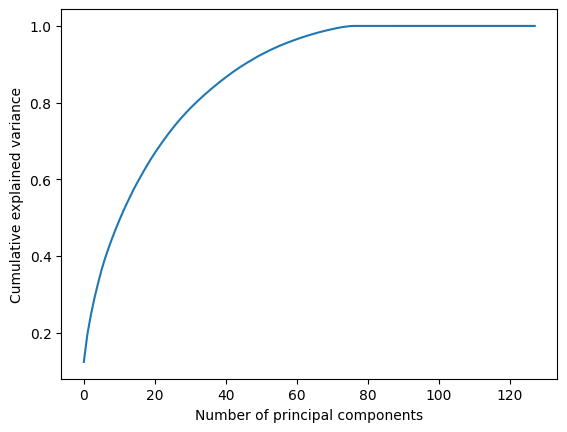

In [39]:
# plot the variance vs number of components
pca.plot_variance()

# Question 2

2. For the same dataset “gender.csv” (2 classes, male and female)
a) Use LDA to reduce the dimension from d to d‟. (Here d=128)
b) Choose the direction „W‟ to reduce the dimension d‟ (select appropriate d‟).
c) Use d‟ features to classify the test cases (use any classification algorithm will do, Bayes classifier, minimum distance classifier, and so on).

## LDA using Inbuilt Function

In [40]:
# perform LDA on the training data using inbuilt function in sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)

lda.fit(df, df_labels)

# transform the training data   
df_train_lda = lda.transform(df_train)

# transform the testing data
df_test_lda = lda.transform(df_test)

# classify the testing data using Nearest Neighbor Classifier and print the accuracy
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(df_train_lda, df_train_labels)

pred = knn.predict(df_test_lda)

print("Accuracy of the Nearest Neighbor model is: ", accuracy_score(df_test_labels, pred)*100, "%")

# classify the testing data using Naive Bayes Classifier and print the accuracy
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(df_train_lda, df_train_labels)

pred = gnb.predict(df_test_lda)

print("Accuracy of the Naive Bayes model is: ", accuracy_score(df_test_labels, pred)*100, "%")


Accuracy of the Nearest Neighbor model is:  85.0 %
Accuracy of the Naive Bayes model is:  90.0 %


## **LDA Without using Inbuilt Function**

In [41]:
# class LDA is defined to perform LDA on the data without using inbuilt functions and to capture 95% of variance
class LDA_inbuilt:
    # constructor to initialize the Class
    def __init__(self, n_components = 1):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.variance = None
        self.explained_variance = None
        
    # function to fit the data using scatter matrix sw and sb
    # Within class scatter matrix:
    # SW = sum((X_c - mean_X_c)^2 )
    # Between class scatter matrix:
    # SB = sum( n_c * (mean_X_c - mean_overall)^2 )
    def fit(self, X, y):
        # number of features
        self.n_features = X.shape[1]
        # overall mean
        self.mean = np.mean(X, axis = 0).values.reshape(self.n_features, 1)
        labels = np.unique(y)
        # initialize the scatter matrices
        sw = np.zeros((self.n_features, self.n_features))
        sb = np.zeros((self.n_features, self.n_features))

        # calculate the scatter matrices
        for c in labels:
            X_c = X[y == c]
            X_c = np.array(X_c)
            mean_c = np.array(np.mean(X_c, axis = 0))
            mean_c = mean_c.reshape(self.n_features, 1)
            # calculate the scatter matrix for each class
            for i in range(X_c.shape[0]):
                sw += (X_c[i].reshape(self.n_features, 1) - mean_c).dot((X_c[i].reshape(self.n_features, 1) - mean_c).T)
            #sw += np.dot((X_c - mean_c).T, (X_c - mean_c))
            # calculate the scatter matrix for all classes
            n_c = X_c.shape[0]
            #print(n_c * (mean_c - self.mean).dot((mean_c - self.mean).T))
            sb += n_c * (mean_c - self.mean).dot((mean_c - self.mean).T)

        #print("Scatter matrix SW is: ", sw)
        #print("Scatter matrix SB is: ", sb)
        # calculate the eigen values and eigen vectors of the scatter matrices
        eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.inv(sw), sb))

        #print("Eigen values are: ", eigen_values)

        # sort the eigen values in descending order
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

        # calculate the number of components required to capture 95% of variance
        self.variance = sum(eigen_values)

        # print the explained variance for each eigen value
        self.explained_variance = [np.real(i/self.variance) for i in sorted(eigen_values, reverse = True)]
        # for i in range(len(self.explained_variance)):
        #     print("Explained variance for eigen value", i+1, "is: ", self.explained_variance[i])

        cum_sum = 0
        for i in range(len(self.explained_variance)):
            cum_sum += self.explained_variance[i]
            if cum_sum/self.variance >= 0.95: 
                self.n_components = i + 1
                break

        # store the eigen vectors corresponding to the eigen values in descending order
        self.components = np.real(np.array([eigen_pairs[i][1] for i in range(self.n_components)]))

    # function to plot the variance vs number of components
    def plot_variance(self):
        plt.plot(np.cumsum(self.explained_variance))
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.show()
        
    def transform(self, X):
        # X = X - self.mean
        return np.dot(X, self.components.T)

In [42]:
# perform LDA on the training data using the LDA class defined above

lda = LDA_inbuilt()

lda.fit(df, df_labels)

# transform the training data
df_train_lda = lda.transform(df_train)

# transform the testing data
df_test_lda = lda.transform(df_test)

# classify the testing data using Nearest Neighbor Classifier and print the accuracy
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(df_train_lda, df_train_labels)

pred_mindist_lda = knn.predict(df_test_lda)

print("Accuracy of the Nearest Neighbor model is: ", accuracy_score(df_test_labels, pred_mindist_lda)*100, "%")

# classify the testing data using Naive Bayes Classifier and print the accuracy
gnb = GaussianNB()

gnb.fit(df_train_lda, df_train_labels)

pred_nb_lda = gnb.predict(df_test_lda)

print("Accuracy of the Naive Bayes model is: ", accuracy_score(df_test_labels, pred_nb_lda)*100, "%")


Accuracy of the Nearest Neighbor model is:  85.0 %
Accuracy of the Naive Bayes model is:  100.0 %


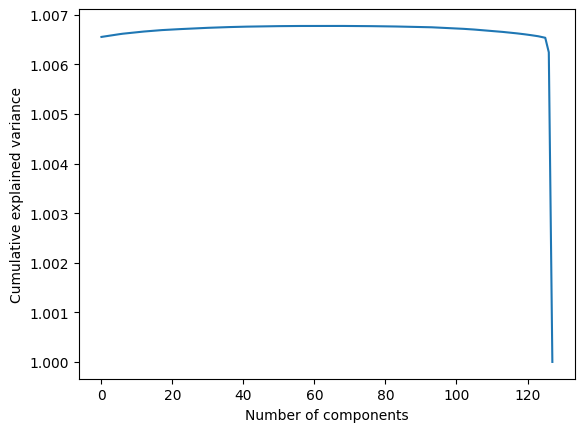

In [43]:
# plot the variance vs number of components
lda.plot_variance()

# Question 3

3. Give the comparative study for the above results w.r.t to classification accuracy in terms of the confusion matrix.

In [44]:
# compare the accuracy of the models using PCA and LDA using confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix for the Nearest Neighbor model using PCA
print("Confusion Matrix for the Nearest Neighbor model using PCA is: ")
print(confusion_matrix(df_test_labels, pred_mindist_pca))

# classification report for the Naive Bayes model using PCA
print("Classification Report for the Nearest Neighbor model using PCA is: ")
print(classification_report(df_test_labels, pred_mindist_pca))

# confusion matrix for the Nearest Neighbor model using LDA
print("Confusion Matrix for the Nearest Neighbor model using LDA is: ")
print(confusion_matrix(df_test_labels, pred_mindist_lda))

# classification report for the Naive Bayes model using LDA
print("Classification Report for the Nearest Neighbor model using LDA is: ")
print(classification_report(df_test_labels, pred_mindist_lda))


Confusion Matrix for the Nearest Neighbor model using PCA is: 
[[8 2]
 [1 9]]
Classification Report for the Nearest Neighbor model using PCA is: 
              precision    recall  f1-score   support

      female       0.89      0.80      0.84        10
        male       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Confusion Matrix for the Nearest Neighbor model using LDA is: 
[[9 1]
 [2 8]]
Classification Report for the Nearest Neighbor model using LDA is: 
              precision    recall  f1-score   support

      female       0.82      0.90      0.86        10
        male       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [45]:
# confusion matrix for the Naive Bayes model using PCA
print("Confusion Matrix for the Naive Bayes model using PCA is: ")
print(confusion_matrix(df_test_labels, pred_nb_pca))

# classification report for the Naive Bayes model using PCA
print("Classification Report for the Naive Bayes model using PCA is: ")
print(classification_report(df_test_labels, pred_nb_pca))

# confusion matrix for the Naive Bayes model using LDA
print("Confusion Matrix for the Naive Bayes model using LDA is: ")
print(confusion_matrix(df_test_labels, pred_nb_lda))

# classification report for the Naive Bayes model using LDA
print("Classification Report for the Naive Bayes model using LDA is: ")
print(classification_report(df_test_labels, pred_nb_lda))

Confusion Matrix for the Naive Bayes model using PCA is: 
[[8 2]
 [1 9]]
Classification Report for the Naive Bayes model using PCA is: 
              precision    recall  f1-score   support

      female       0.89      0.80      0.84        10
        male       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Confusion Matrix for the Naive Bayes model using LDA is: 
[[10  0]
 [ 0 10]]
Classification Report for the Naive Bayes model using LDA is: 
              precision    recall  f1-score   support

      female       1.00      1.00      1.00        10
        male       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



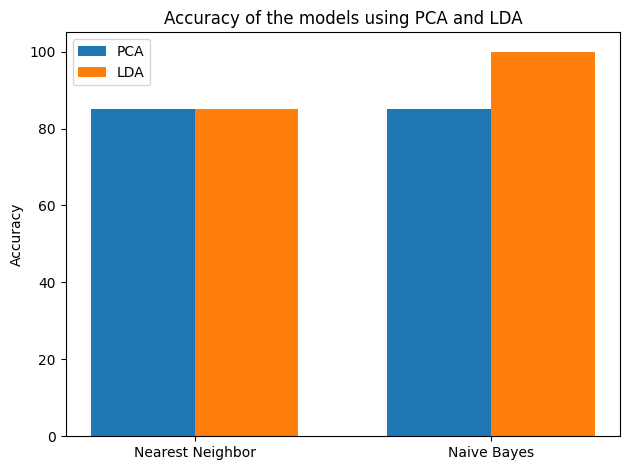

In [46]:
# compare the accuracy of the models using PCA and LDA using a plot
# plot the accuracy of the models using PCA and LDA
models = ['Nearest Neighbor', 'Naive Bayes']
pca = [accuracy_score(df_test_labels, pred_mindist_pca)*100, accuracy_score(df_test_labels, pred_nb_pca)*100]
lda = [accuracy_score(df_test_labels, pred_mindist_lda)*100, accuracy_score(df_test_labels, pred_nb_lda)*100]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pca, width, label='PCA')
rects2 = ax.bar(x + width/2, lda, width, label='LDA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models using PCA and LDA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
fig.tight_layout()
plt.show()

# Question 4

4. Eigenfaces-Face classification using PCA (40 classes)
a) Use the following “face.csv” file to classify the faces of 40 different people using PCA.
b) Do not use the in-built function for implementing PCA.
c) Use appropriate classifier taught in class (use any classification algorithm taught in class like Bayes classifier, minimum distance classifier, and so on )
d) Refer to the following link for a description of the dataset:
https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3ea

In [47]:
data = pd.read_csv("./face.csv")

data.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [48]:
print(data.shape)

print(data['target'].nunique())

(400, 4097)
40


In [49]:
# split the data into features and labels
X = data.drop('target', axis = 1)
y = data['target']

In [50]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
# perform PCA on the training data using the PCA class defined above
pca = PCA_inbuilt()

pca.fit(X)

# transform the training data
X_train_pca = pca.transform(X_train)

# transform the testing data
X_test_pca = pca.transform(X_test)

# classify the testing data using Nearest Neighbor Classifier and print the accuracy
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train_pca, y_train)

pred_mindist_pca = knn.predict(X_test_pca)

print("Accuracy of the Nearest Neighbor model is: ", accuracy_score(y_test, pred_mindist_pca)*100, "%")

# classify the testing data using Naive Bayes Classifier and print the accuracy
gnb = GaussianNB()

gnb.fit(X_train_pca, y_train)

pred_nb_pca = gnb.predict(X_test_pca)

print("Accuracy of the Naive Bayes model is: ", accuracy_score(y_test, pred_nb_pca)*100, "%")

Variance captured by component 1 is 0.23812729340708239
Variance captured by component 2 is 0.1399397096891602
Variance captured by component 3 is 0.07968613661718442
Variance captured by component 4 is 0.04998331314541597
Variance captured by component 5 is 0.03609847976557144
Variance captured by component 6 is 0.03156939302170351
Variance captured by component 7 is 0.02426832310660358
Variance captured by component 8 is 0.020363976686123293
Variance captured by component 9 is 0.019581141191121868
Variance captured by component 10 is 0.016721218261489427
Variance captured by component 11 is 0.015952217363088935
Variance captured by component 12 is 0.014369788617098356
Variance captured by component 13 is 0.012467410668003668
Variance captured by component 14 is 0.011471331814274104
Variance captured by component 15 is 0.010628773619193621
Variance captured by component 16 is 0.009777203337637408
Variance captured by component 17 is 0.009190602830068234
Variance captured by component 

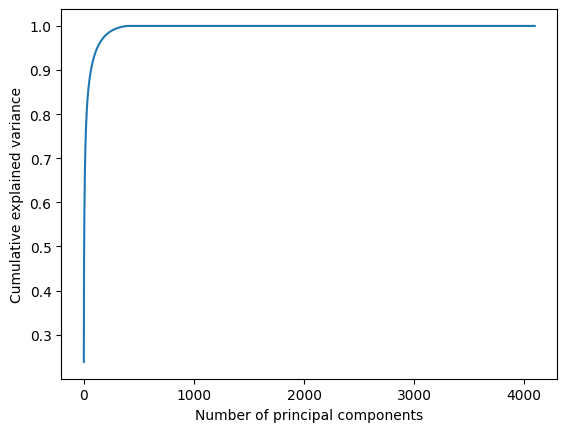

In [52]:
# plot the variance vs number of components
pca.plot_variance()

# Question 5

5. Fisherfaces- Face classification using LDA (40 classes)
a) Use the following “face.csv” file to classify the faces of 40 different people using LDA.
b) Do not use the in-built function for implementing LDA.
c) Use appropriate classifier taught in class (any classification algorithm taught in class like Bayes classifier, minimum distance classifier, and so on )
d) Refer to the following link for a description of the dataset:
https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3e

In [53]:
# perform LDA on the training data using the LDA class defined above

lda = LDA_inbuilt()

lda.fit(X, y)

# transform the training data
X_train_lda = lda.transform(X_train)

# transform the testing data
X_test_lda = lda.transform(X_test)

# classify the testing data using Nearest Neighbor Classifier and print the accuracy
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train_lda, y_train)

pred_mindist_lda = knn.predict(X_test_lda)

print("Accuracy of the Nearest Neighbor model is: ", accuracy_score(y_test, pred_mindist_lda)*100, "%")

# classify the testing data using Naive Bayes Classifier and print the accuracy
gnb = GaussianNB()

gnb.fit(X_train_lda, y_train)

pred_nb_lda = gnb.predict(X_test_lda)

print("Accuracy of the Naive Bayes model is: ", accuracy_score(y_test, pred_nb_lda)*100, "%")

Accuracy of the Nearest Neighbor model is:  100.0 %
Accuracy of the Naive Bayes model is:  100.0 %


# THE-END